# Last Changes (4/05/2018):

* all functions: changed to use final_data dataframes as input
* added `get_total_mutations()` function

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# Reference simulations used to test analyses on (100 simulations)

In [2]:
%%time
l = 10**6
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 0

refPops_data = run_simulations(100, l, q, qfac, alpha, selection=0)  # list of dataframes

Populations simulated: 100
CPU times: user 10.6 s, sys: 103 ms, total: 10.7 s
Wall time: 10.8 s


In [5]:
type(refPops_data[0])

pandas.core.frame.DataFrame

In [3]:
%%time
l = 10**6
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 0.3

refSelPops_data = run_simulations(100, l, q, qfac, alpha, selection=0.3)  # list of dataframes

Populations simulated: 100
CPU times: user 12 s, sys: 156 ms, total: 12.2 s
Wall time: 12.6 s


# Defining Population scores

Single-value variables that represent some kind of characteristic about the population, which can be used to average multiple simulations of the same population and to compare different populations.

## Maximum and average allele frequency

In [6]:
def get_max_AFs(populations_data, det_lim=1):
    '''Returns an array containing the maximum subclone allele frequencies from a given set of populations
        Uses the final_data() function from ThesisScripts.Analyses to get the allele frequencies
        Option to set a detection limit (det_lim, default 1)'''
    max_afs = np.empty(len(populations_data))

    for i in range(len(populations_data)):
        data = populations_data[i]
        mutations = data.loc[data['Family size'] >= det_lim].iloc[1:]
        max_af = mutations['Allele frequency'].max()
        max_afs[i] = max_af
    
    return max_afs

In [11]:
def get_avg_AFs(populations_data, det_lim=1):
    '''Returns an array containing the average subclone allele frequencies from a given set of populations
        Option to set a detection limit (det_lim, default 1)'''
    avg_afs = np.empty(len(populations_data))

    for i in range(len(populations_data)):
        data = populations_data[i]
        mutations = data.loc[data['Family size'] >= det_lim].iloc[1:]
        avg_af = mutations['Allele frequency'].mean()
        avg_afs[i] = avg_af
    
    return avg_afs

In [21]:
%%time
ref_MaxAFs = get_max_AFs(refPops_data, det_lim=100)
refSel_MaxAFs = get_max_AFs(refSelPops_data, det_lim=100)

CPU times: user 182 ms, sys: 5.58 ms, total: 187 ms
Wall time: 185 ms


In [22]:
%%time
ref_AvgAFs = get_avg_AFs(refPops_data, det_lim=100)
refSel_AvgAFs = get_avg_AFs(refSelPops_data, det_lim=100)

CPU times: user 174 ms, sys: 3.98 ms, total: 178 ms
Wall time: 176 ms


In [8]:
#sns.set_style("whitegrid");
#sns.swarmplot(data=[ref_MaxAFs, refSel_MaxAFs], orient='v');
#plt.ylabel('Max Allele Frequency');
#plt.xticks([0, 1], ["Neutral", "Selection"])
#plt.yscale('log');
#plt.show()

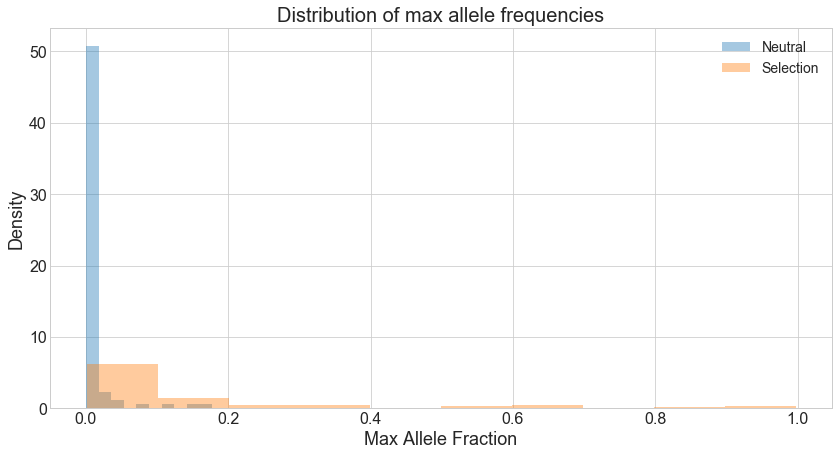

In [17]:
sns.distplot(ref_MaxAFs, bins=10, norm_hist=True, kde=False, label="Neutral");
sns.distplot(refSel_MaxAFs, bins=10, norm_hist=True, kde=False, label="Selection");
plt.title('Distribution of max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.show()

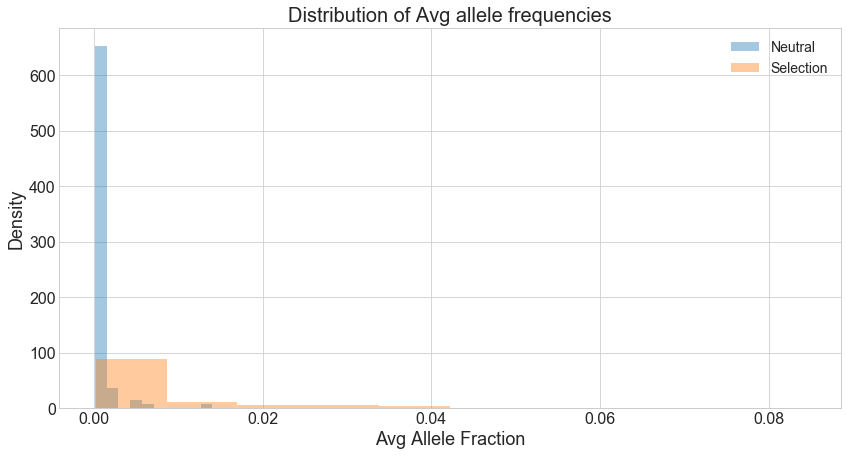

In [18]:
sns.distplot(ref_AvgAFs, bins=10, norm_hist=True, kde=False, label="Neutral");
sns.distplot(refSel_AvgAFs, bins=10, norm_hist=True, kde=False, label="Selection");
plt.title('Distribution of Avg allele frequencies');
plt.xlabel('Avg Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.show()

In [10]:
#sns.swarmplot(data=[ref_AvgAFs, refSel_AvgAFs], orient='v');
#plt.ylabel('Average Allele Frequency');
#plt.xticks([0, 1], ["Neutral", "Selection"])
#plt.yscale('log');
#plt.show()

## $R^2$ values when fitting cumulative number of mutations against $1/f$

In [19]:
def get_fit_r_values(populations_data, det_lim=1):
    '''Returns an array containing the R2 values of fitting the cumulative number of mutations against
        1/f (with f = allele frequency), calculated by fit_cumulative_mutations()'''

    r_values = np.empty(len(populations_data))

    for i in range(len(populations_data)):
        data = populations_data[i]
        r = fit_cumulative_mutations(data, det_lim=det_lim, plot=False)
        r_values[i] = r

    return r_values

In [23]:
%%time
ref_r_values = get_fit_r_values(refPops_data, det_lim = 100)
refSel_r_values = get_fit_r_values(refSelPops_data, det_lim = 100)

CPU times: user 247 ms, sys: 5.32 ms, total: 253 ms
Wall time: 251 ms


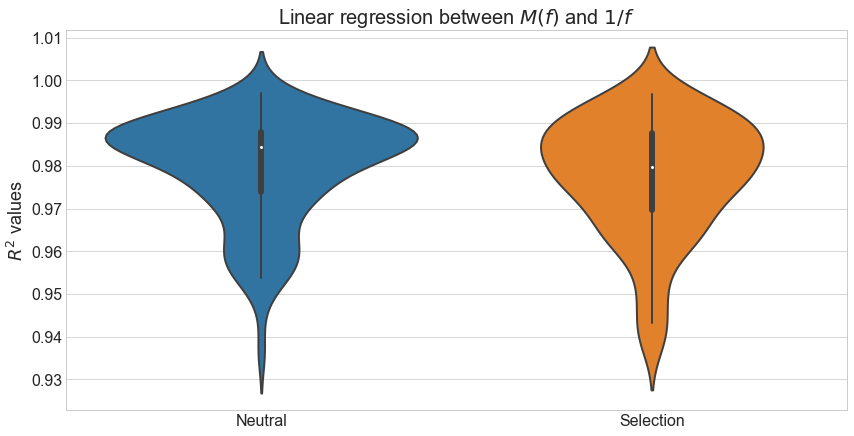

In [24]:
sns.violinplot(data=[ref_r_values, refSel_r_values]);
plt.title(r"Linear regression between $M(f)$ and $1/f$");
plt.ylabel(r"$R^2$ values");
plt.xticks([0, 1], ["Neutral", "Selection"]);
plt.show()

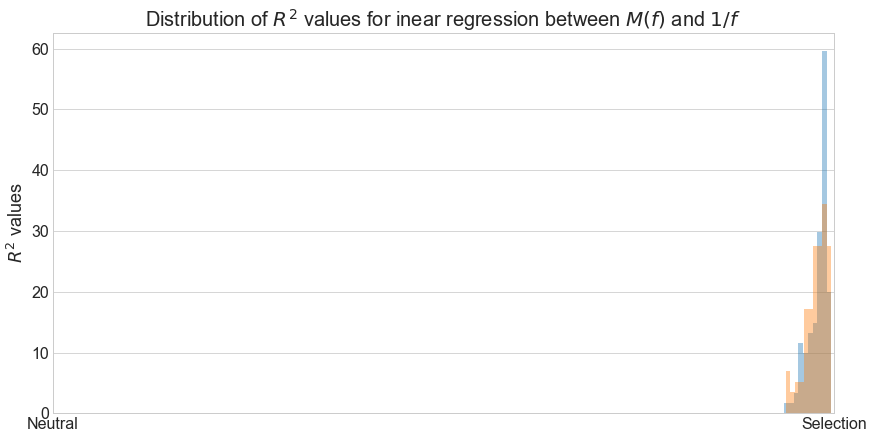

In [27]:
sns.distplot(ref_r_values, bins=10, norm_hist=True, kde=False, label="Neutral");
sns.distplot(refSel_r_values, bins=10, norm_hist=True, kde=False, label="Selection");
plt.title(r"Distribution of $R^2$ values for inear regression between $M(f)$ and $1/f$");
plt.ylabel(r"$R^2$ values");
plt.xticks([0, 1], ["Neutral", "Selection"]);
plt.show()

## Heterogeneity: Simpson's diversity index

In [28]:
def get_heterogeneity(populations_data, det_lim=1):
    '''Returns an array containing the Simpson's diversity indices of the given populatons, calculated by
        the heterogeneity() function
        Option to set a detection limit (det_lim=1)'''
    
    h_arr = np.empty(len(populations_data))
    
    for i in range(len(populations_data)):
        h = heterogeneity(populations_data[i], det_lim=det_lim)
        h_arr[i] = h
        
    return h_arr

In [30]:
%%time
ref_H = get_heterogeneity(refPops_data, det_lim=100)
refSel_H = get_heterogeneity(refSelPops_data, det_lim=100)

CPU times: user 185 ms, sys: 7.82 ms, total: 193 ms
Wall time: 189 ms


In [16]:
#sns.set_style("whitegrid")
#sns.swarmplot(data=[ref_H, refSel_H]);
#plt.ylabel("Heterogeneity");
#plt.xticks([0, 1], ["Neutral", "Selection"]);
#plt.show()

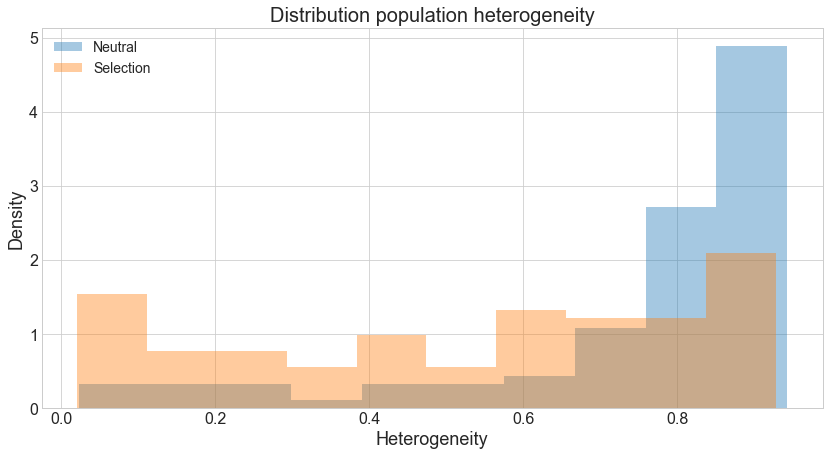

In [32]:
sns.distplot(ref_H, bins=10, norm_hist=True, kde=False, label="Neutral");
sns.distplot(refSel_H, bins=10, norm_hist=True, kde=False, label="Selection");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.show()

## Distribution of number of mutations

Cfr. bar charts of num_mutations for single populations. Do the same, but now averaging each bar over the simulations and creating error bars from the standard deviation.

In [33]:
def get_mutation_distributions(populations_data, det_lim=1):
    '''Returns a DataFrame containing the cell counts for each number of mutations from the set of populations.
        Uses the num_mutations_distribution() function from ThesisScripts.Analyses to get the distribution of 
            mutations.
        Optional to set a detection limit (det_lim, default 1)'''
    
    df = pd.DataFrame()  # initialize empty dataframe to store the cell counts for each population
    
    for i in range(len(populations_data)):
        data = populations_data[i]
        nmd = num_mutations_distribution(data, det_lim=det_lim)
        nmd.columns = ["Population %s" %(i)]
        df = df.join(nmd, how='outer')  # join dataframes together as union
    return df.T

In [34]:
%%time
ref_mut_distr = get_mutation_distributions(refPops_data, det_lim=100)
refSel_mut_distr = get_mutation_distributions(refSelPops_data, det_lim=100)

CPU times: user 1.71 s, sys: 14 ms, total: 1.72 s
Wall time: 1.74 s


### Average number of mutations

Average number of mutations carried by a cell, weighted by the number of cells carrying a certain number of mutations (see *notitieboekske*).

In [35]:
ref_avg_nmd = ref_mut_distr.mean()
ref_std_nmd = ref_mut_distr.std()

In [36]:
refSel_avg_nmd = refSel_mut_distr.mean()
refSel_std_nmd = refSel_mut_distr.std()

In [37]:
%%time
ref_avg_num_mut = avg_num_mutations(ref_avg_nmd)
refSel_avg_num_mut = avg_num_mutations(refSel_avg_nmd)

CPU times: user 1.1 ms, sys: 210 µs, total: 1.31 ms
Wall time: 2.11 ms


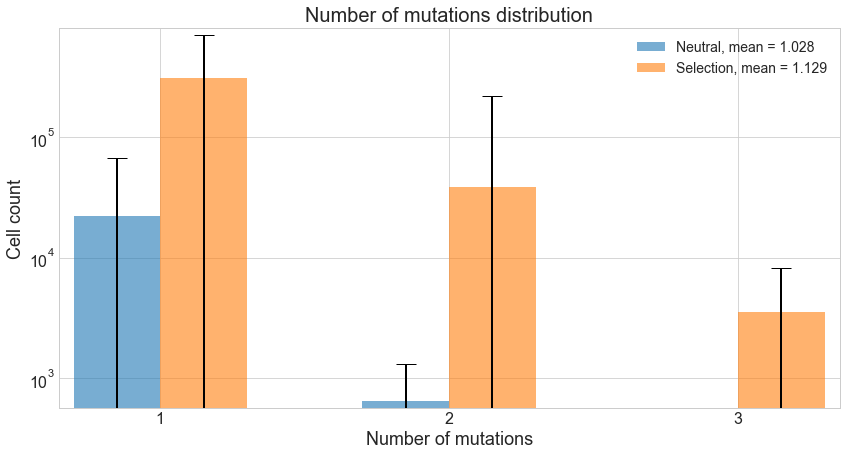

In [38]:
ref_errors = ref_std_nmd.values
refSel_errors = refSel_std_nmd.values

plt.bar(left=ref_avg_nmd.index-0.15, height=ref_avg_nmd.values, width=0.3, alpha=0.6, align='center', 
        yerr=ref_errors, capsize=10,
        label="Neutral, mean = %s" %(round(ref_avg_num_mut, 3)));

plt.bar(left=refSel_avg_nmd.index+0.15, height=refSel_avg_nmd.values, width=0.3, alpha=0.6, align='center',
        yerr=refSel_errors, capsize=10, 
        label="Selection, mean = %s" %(round(refSel_avg_num_mut, 3)));

plt.title("Number of mutations distribution");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(refSel_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.show()

## Total number of mutations (M)

In [40]:
def get_total_mutations(populations_data, det_lim=1):
    '''Returns an array containing the total number of detectable mutations within
        each population'''
    m_arr = np.empty(len(populations_data))
    
    for i in range(len(populations_data)):
        data = populations_data[i]
        data = data.loc[data["Family size"] > det_lim]
        m = len(data) - 1  # don't count ancestral clone
        m_arr[i] = m
        
    return m_arr

In [47]:
%%time
ref_total_m = get_total_mutations(refPops_data, det_lim = 1)
refSel_total_m = get_total_mutations(refSelPops_data, det_lim = 1)

CPU times: user 143 ms, sys: 4.38 ms, total: 147 ms
Wall time: 146 ms


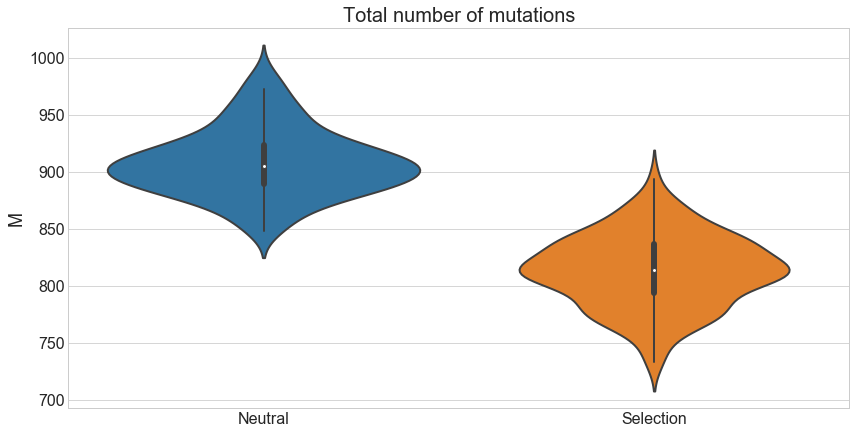

In [48]:
sns.violinplot(data=[ref_total_m, refSel_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0, 1], ["Neutral", "Selection"]);
plt.show()

## Error in reconstruction of the mutational timeline

Calculate the errors between the real clone birthdays and their estimated birthdays and take median of these for each population.

In [53]:
def get_reconstruction_errors(populations_data, alpha, det_lim=1):
    '''Returns an array containing the median errors of reconstructing the mutational timeline for the given
        set of populations, i.e. the MAD of the reconstructed timepoints around their real value.
        Option to set a detection limit (det_lim, default 1)'''
    
    med_errors = np.empty(len(populations_data))
    
    for i in range(len(populations_data)):
        errors = reconstruct_mutational_timeline(populations_data[i], alpha=alpha, det_lim=det_lim)[2]
        med_errors[i] = np.median(errors)
        
    return med_errors

In [54]:
print(alpha)

0.3


In [55]:
%%time
ref_rec_errors = get_reconstruction_errors(refPops_data, alpha, det_lim=100)
refSel_rec_errors = get_reconstruction_errors(refSelPops_data, alpha, det_lim=100)

CPU times: user 663 ms, sys: 7.58 ms, total: 671 ms
Wall time: 674 ms


In [26]:
#sns.swarmplot(data=[ref_rec_errors, refSel_rec_errors]);
#plt.ylabel("Median reconstruction errors");
#plt.xticks([0, 1], ["Neutral", "Selection"]);
#plt.show()

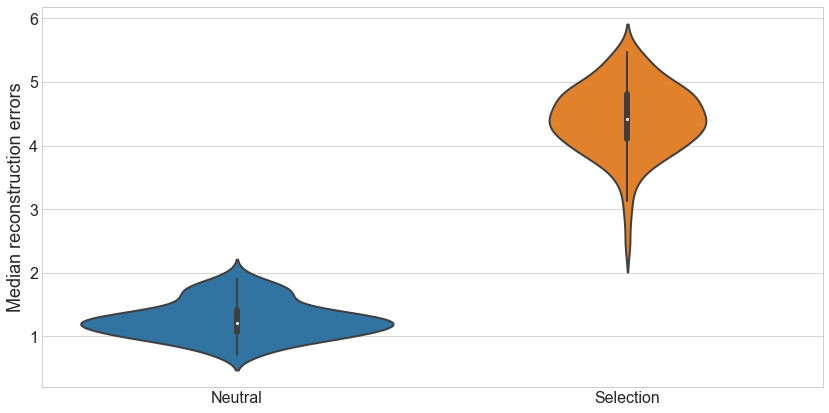

In [56]:
sns.violinplot(data=[ref_rec_errors, refSel_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0, 1], ["Neutral", "Selection"]);
plt.show()